In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Two sample testing (A/B testing) : Smokers and Nonsmokers


The data frame *baby_df* contains the following variables for 1,174 mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days, the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

**We want to investigate first the association of maternal smoking with birth weight**

In [ ]:
baby_df = pd.read_csv('baby.csv')
print(baby_df.shape)
baby_df.head(7)

In [ ]:
# a data frame with the two columns of interest
smoking_weight = baby_df[['Maternal Smoker', 'Birth Weight']]

In [ ]:
smoking_weight.groupby('Maternal Smoker').count()

## Two sample testing (A/B testing)

#### Compare value of sampled observations in two groups (say, Group A and Group B).
- A: Birth weights of babies of mothers who smoked during pregnancy
- B: Birth weights of babies of mothers who did not smoke


####  **Question:** Do the two sets of values come from the same distribution?
- **Null Hypothesis**: In the population, the distributions of the birth weights of babies in the two groups are the same.  
- **Alternative Hypothesis**: In the population, the two distributions are different

**How can we compare (characterize) distributions?**

Start with visualization.

In [ ]:
# this solution is not satisfactory; why?
smoking_weight.hist('Birth Weight', by = 'Maternal Smoker');

In [ ]:
# the arrays of weights for non-smoker and smoker
nsw=smoking_weight[smoking_weight['Maternal Smoker']==False]['Birth Weight'].values
sw=smoking_weight[smoking_weight['Maternal Smoker']==True]['Birth Weight'].values

#overlapping histograms
bins = np.linspace(50, 180, 20)
plots.hist(nsw, bins, alpha=0.5, label='No')
plots.hist(sw, bins, alpha=0.5, label='Yes')
plots.legend(loc='upper right')
plots.show()

In [ ]:
# alternative to histograms
plots.boxplot([nsw,sw],labels=("Nonsmokers","Smokers"));

## The boxplot
- has a box with ends at the quartiles: $Q_1$ = Lower Quartile = 25th percentile; $Q_3$ = Upper Quartile = 75th percentile
- a central line at the median
- observations outside the range $\left[ Q_1-\frac{3}{2}IQR,Q_3+\frac{3}{2}IQR\right]$ are plotted individually as possible outliers ($IQR=Q_3-Q1$)
- whiskers are drawn to the extreme data points within the above range. 

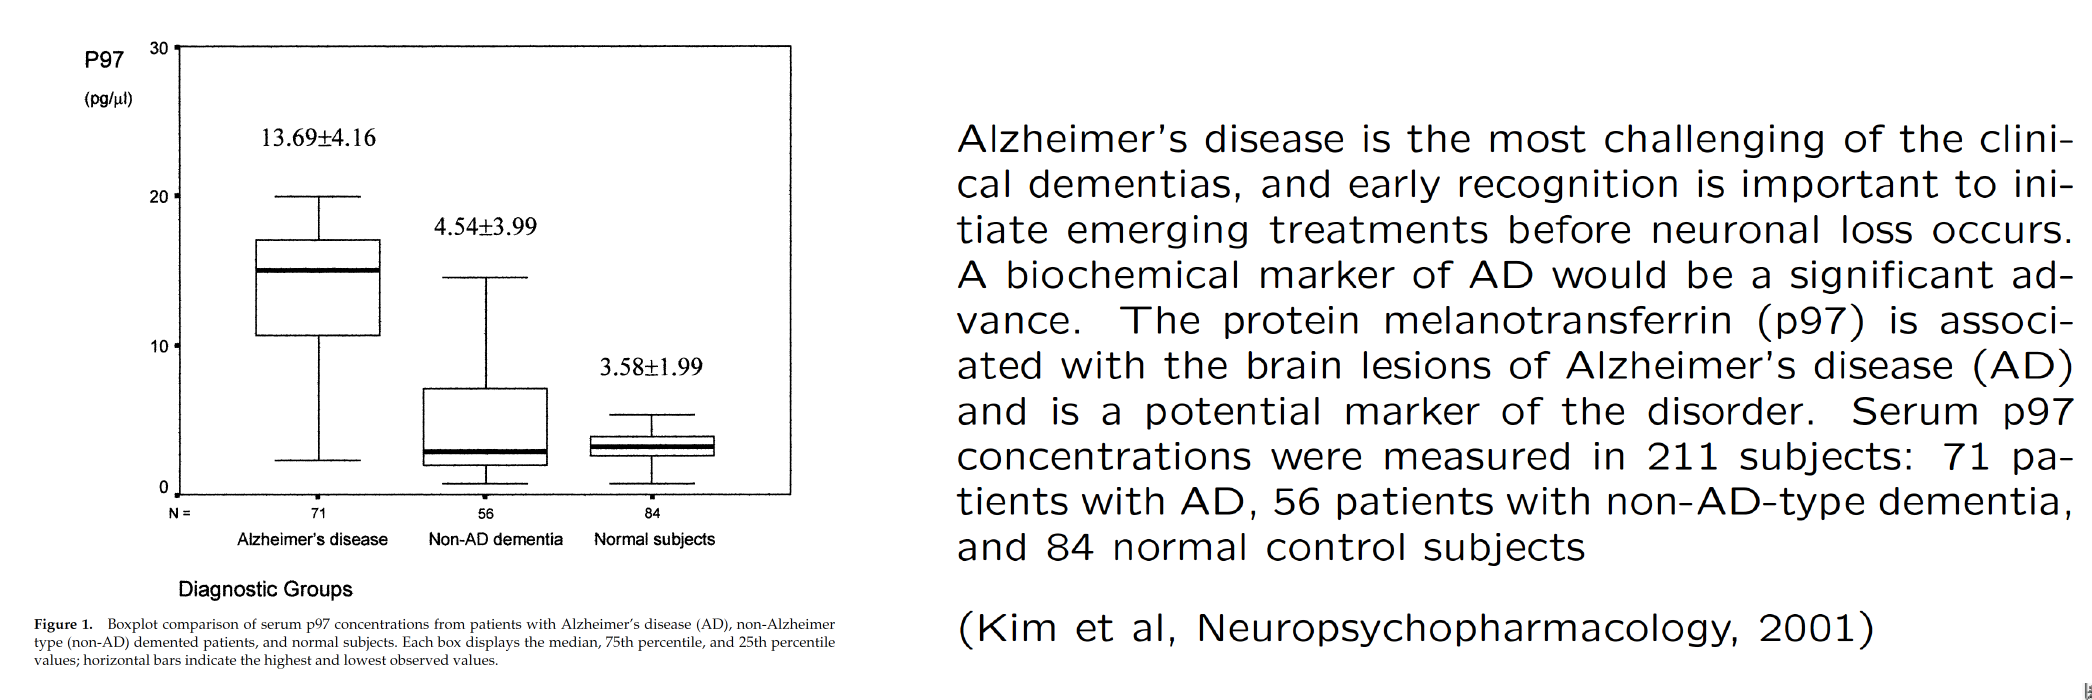

## Center of the distribution
Let $x_1,x_2,...,x_n$ be a set of numbers
- **The Median**: (i) not affected by outliers (robust); (ii) computationally intensive
- **The Mean** (arithmetic average): (i) easy to calculate; (ii) easy to work with algebraically; 
$$\bar{x}=\frac{x_1+x_2+...+x_n}{n}=\frac{1}{n}\sum_{i=1}^n x_i$$
- **Which measure of center is appropriate?** It depends on: shape of distribution, scale of measurement, and goal of the analysis

## Spread/Variability of a distribution
- **Range** = Maximum - Minimum: (i) depends entirely on two observations; (ii) affected by sample size; (iii) highly affected by outliers
- **Inter-quartile Range** = $Q_3-Q_1$ (not affected by outliers)
- **Variance and Standard Deviation**: Measure how far the data are from their average

Sample variance:
$$s^2=\frac{1}{n-1}\sum_{i=1}^n (x_i-\bar{x})^2$$
Standard deviation: 
$$s=\sqrt{s^2}$$


In [ ]:
# the sample means in the two groups
means_df = smoking_weight.groupby('Maternal Smoker').mean()
means_df

In [ ]:
# the sample medians
medians_df = smoking_weight.groupby('Maternal Smoker').median()
medians_df

In [ ]:
# the sample standard deviation
sds_df = smoking_weight.groupby('Maternal Smoker').std()
sds_df

In [ ]:
# the difference in the means 
observed_difference = means_df.iloc[0] - means_df.iloc[1]
observed_difference

## Two sample testing (A/B testing)
#### Testing hypotheses recap:
- A null hypothesis $H_0$ 
- An alternative hypothesis $H_A$
- A test statistic (in many situations associated to a model);
- A decision or a measure of significance (p-value) based on the **null distribution of the test statistic**


**In birth weights example:**
- **Null Hypothesis**: In the population, the distributions of the birth weights of babies in the two groups are the same.  
- **Alternative Hypothesis**: In the population, the two distributions are different
- Statistic: Group A average - Group B average
- Null distribution?


## Permutation test
- If the null hypothesis is true: a birth weight is equally likely to be sampled from group A or group B
- If the null is true: all rearrangements (permutations) of the birth weights among the two groups are equally likely

#### Simulate to learn the null distribution:
- Shuffle (permute) the birth weights
- Assign some to ``Group A`` and the rest to ``Group B`` maintaining the two sample sizes
- Find the differences between averages of the two shuffled (permuted) groups
- Repeat

The generated distribution and the value of the test statistic are used to calculate a p-value. 


In [ ]:
weights = smoking_weight[['Birth Weight']]
weights.head(5)

In [ ]:
# what do you think we are obtaining here?
weights.sample(len(weights),replace = False).head(5)

In [ ]:
shuffled_weights = weights.sample(len(weights),replace = False)['Birth Weight'].values

In [ ]:
original_and_shuffled=smoking_weight
original_and_shuffled['Shuffled Weights']=shuffled_weights
original_and_shuffled.head(10)

In [ ]:
original_and_shuffled.groupby('Maternal Smoker').mean()

In [ ]:
group_labels = baby_df['Maternal Smoker'].values
group_labels

In [ ]:
# this cell puts together the code from the cells above
shuffled_weights = weights.sample(len(weights),replace = False)['Birth Weight'].values
shuffled_df=pd.DataFrame({"Shuffled Weights":shuffled_weights,"Label":group_labels})
smeans_df=shuffled_df.groupby('Label').mean()

smeans_df

In [ ]:
differences = np.array([])

for i in np.arange(5000):
    shuffled_weights = weights.sample(len(weights),replace = False)['Birth Weight'].values
    shuffled_df=pd.DataFrame({"Shuffled Weights":shuffled_weights,"Label":group_labels})
    smeans_df=shuffled_df.groupby('Label').mean()
    new_diff=smeans_df.iloc[0]-smeans_df.iloc[1] 
    differences = np.append(differences, new_diff)

In [ ]:
# Histogram of the simulated differences
# Table().with_column('Null Difference Between Means', differences).hist(bins = 20)
plots.hist(differences,bins=np.arange(-4,4,0.25))
plots.title("Null Difference Between Means");


In [ ]:
observed_difference

### Classical two sample test (optional)

- Same test statistic: Group A sample mean - Group B sample mean
- Different way to get the distribution of the statistic under $H_0$
- **Central Limit Theorem**: The distribution of $\bar{x}_n$ is well approximated by the Normal distribution as n increases.

In [ ]:
# the population where we sample from
pop=np.random.uniform(size=10000)
plots.hist(pop,bins=np.arange(0,1,0.01))
plots.title("Population (n=1)");

In [ ]:
# sample size n=2 - take 5000 samples and calculate their sample means
n=2
sample_means = np.array([])
for i in np.arange(5000):
    sample_means = np.append(sample_means, np.mean(np.random.choice(pop,n)))

plots.hist(sample_means,bins=np.arange(0,1,0.01))
plots.title("n="+str(n));

In [ ]:
# try n=3, 5, 10
n=10
sample_means = np.array([])
for i in np.arange(5000):
    sample_means = np.append(sample_means, np.mean(np.random.choice(pop,n)))

plots.hist(sample_means,bins=np.arange(0,1,0.01))
plots.title("n="+str(n));